# Linear SVM Training

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [2]:
# generate dataset
X, y = make_blobs(
    n_samples=200,
    centers=2,
    random_state=42,
    cluster_std=1.2
)

In [3]:
# train linear SVM
clf = SVC(kernel='linear', C=1e6) # almost "hard-margin"
clf.fit(X, y)

# extract weight vector (w) and bias (b)
w = clf.coef_[0] # [w1, w2]
b = clf.intercept_[0]

print("Weight vector w =", w)
print("Bias b =", b)

Weight vector w = [ 0.30857303 -0.25380687]
Bias b = 1.1157519989399054


In [4]:
# decision boundary
# satisfies: w1*x1 + w2*x2 + b = 0

# for plotting, create a line range:
x1 = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)
# solve for x2:
x2 = -(w[0] * x1 + b) / w[1]

# margins: w·x + b = ±1
margin = 1 / np.linalg.norm(w)
x2_margin_pos = x2 + margin * (w[0]/w[1])
x2_margin_neg = x2 - margin * (w[0]/w[1])

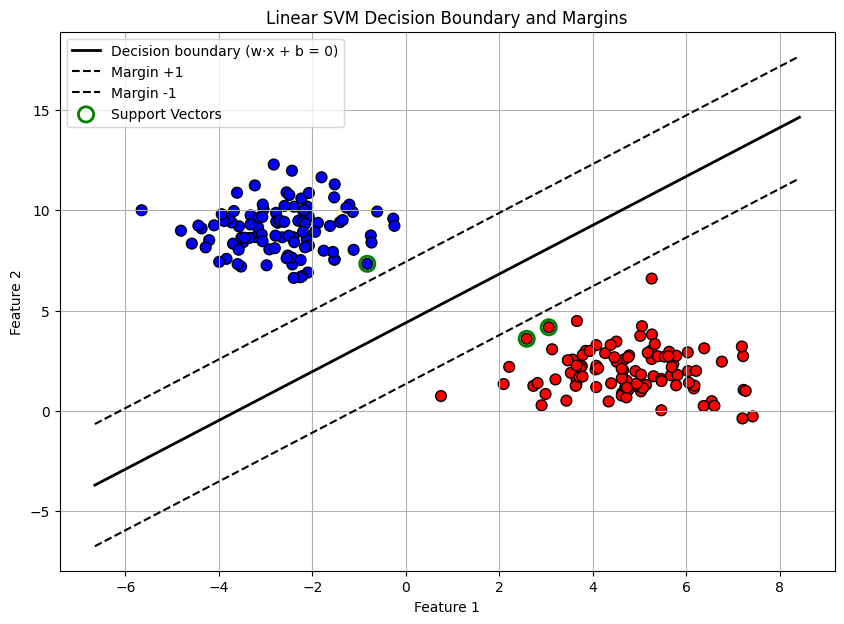

In [5]:
# visualization
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k', s=60)

# decision boundary
plt.plot(x1, x2, 'k-', label='Decision boundary (w·x + b = 0)', linewidth=2)

# margins
plt.plot(x1, x2_margin_pos, 'k--', label='Margin +1')
plt.plot(x1, x2_margin_neg, 'k--', label='Margin -1')

# highlight support vectors
plt.scatter(
    clf.support_vectors_[:,0],
    clf.support_vectors_[:,1],
    s=120, facecolors='none', edgecolors='green', linewidths=2,
    label='Support Vectors'
)

plt.title("Linear SVM Decision Boundary and Margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()